In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import pymc as pm
from os import makedirs

In [7]:
makedirs("data", exist_ok=True)
from urllib.request import urlretrieve
urlretrieve("https://git.io/vXknD","data/challenger_data.csv")

('data/challenger_data.csv', <http.client.HTTPMessage at 0x111bc0b00>)

Temp (F) O-ring failure?
[[ 66.   0.]
 [ 70.   1.]
 [ 69.   0.]
 [ 80.  nan]
 [ 68.   0.]
 [ 67.   0.]
 [ 72.   0.]
 [ 73.   0.]
 [ 70.   0.]
 [ 57.   1.]
 [ 63.   1.]
 [ 70.   1.]
 [ 78.   0.]
 [ 67.   0.]
 [ 53.   1.]
 [ 67.   0.]
 [ 75.   0.]
 [ 70.   0.]
 [ 81.   0.]
 [ 76.   0.]
 [ 79.   0.]
 [ 75.   1.]
 [ 76.   0.]
 [ 58.   1.]
 [ 31.  nan]]


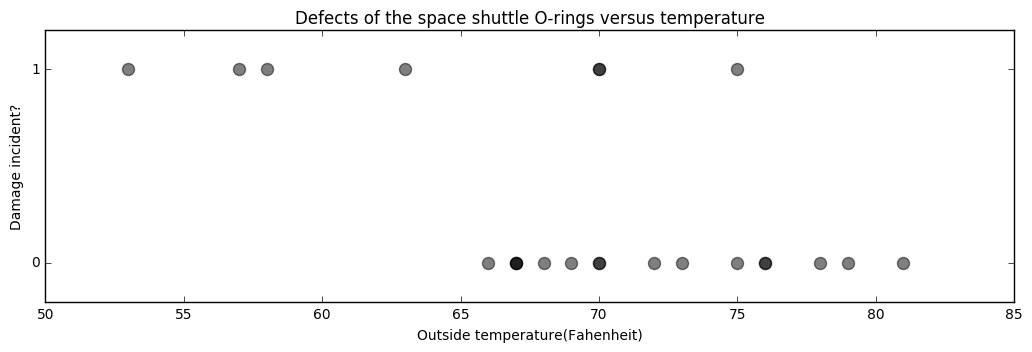

In [10]:
figsize(12.5, 3.5)
np.set_printoptions(precision=3, suppress=True)
challenger_data = np.genfromtxt("data/challenger_data.csv", skip_header=1, usecols=[1, 2], missing_values="NA", delimiter=",")
print("Temp (F) O-ring failure?")
print(challenger_data)
plt.scatter(challenger_data[:, 0], challenger_data[:, 1], s=75, color="k", alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Damage incident?")
plt.xlabel("Outside temperature(Fahenheit)")
plt.title("Defects of the space shuttle O-rings versus temperature")

In [13]:
def logistic(x, beta, alpha=0):
    return 1/(1+np.exp(np.dot(beta, x) + alpha))

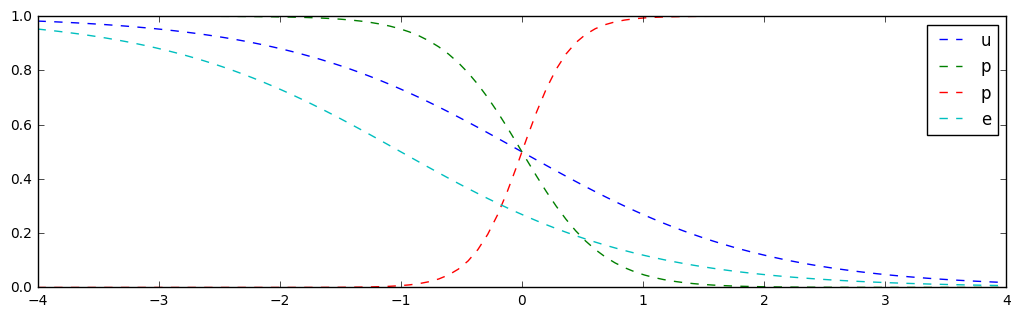

In [18]:
x = np.linspace(-4, 4, 100)
plt.plot(x, logistic(x, 1), label=r"$\beta = 1$", ls="--", lw=1)
plt.plot(x, logistic(x, 3), label=r"$\beta = 3$", ls="--", lw=1)
plt.plot(x, logistic(x, -5), label=r"$\beta = -5$", ls="--", lw=1)
plt.plot(x, logistic(x, 1, 1), label=r"$\beta = 1, \alpha=1$", ls="--", lw=1)
plt.legend("upper right")